<a href="https://colab.research.google.com/github/Jayashree24092004/EV_marketsegmentation/blob/main/customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Customer Segmentation**
## **Project Overview**
This project focuses on segmenting the Electric Vehicle (EV) market in India to identify key customer groups based on their preferences, behaviors, and demographics. The insights derived from this segmentation will aid in tailoring marketing strategies, improving product offerings, and boosting customer satisfaction. The analysis uses customer survey data to understand preferences regarding EV features, charging infrastructure, and price sensitivity.

## **Dataset Description**
The dataset used for this project contains demographic information and customer preferences. The columns include:

**ID:** Unique identifier for each customer.

**Gender:** Customer's gender.

**Ever_Married:** Marital status of the customer.

**Age:** Age of the customer.

**Graduated:** Whether the customer has completed their graduation.

**Profession:** The customer's profession.

**Work_Experience:** Number of years of work experience.

**Spending_Score:** A metric indicating the customer's spending habits.

**Family_Size:** Number of family members in the customer's household.

**Var_1:** Additional customer feature (e.g., preferred type of EV).

**Segmentation:** The segment or cluster each customer belongs to based on their preferences and demographics.

## **Load DataSets**

## **Import Relevant Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train = pd.read_csv("Train.csv")
train.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [ ]:

test=  pd.read_csv("Test.csv")
test.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6,B
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6,A
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6,A
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6,B
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6,A


## **Data cleaning and Data preprocessing**

In [ ]:
train.columns

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2627 non-null   int64  
 1   Gender           2627 non-null   object 
 2   Ever_Married     2577 non-null   object 
 3   Age              2627 non-null   int64  
 4   Graduated        2603 non-null   object 
 5   Profession       2589 non-null   object 
 6   Work_Experience  2358 non-null   float64
 7   Spending_Score   2627 non-null   object 
 8   Family_Size      2514 non-null   float64
 9   Var_1            2595 non-null   object 
 10  Segmentation     2627 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 225.9+ KB


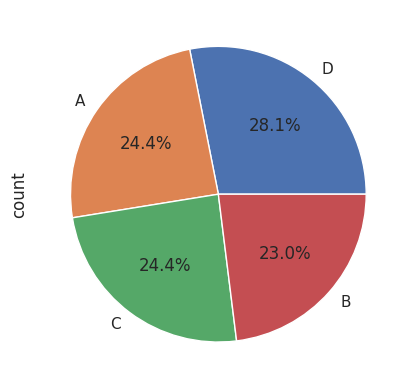

In [ ]:
train['Segmentation'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.show()

## **Gender**

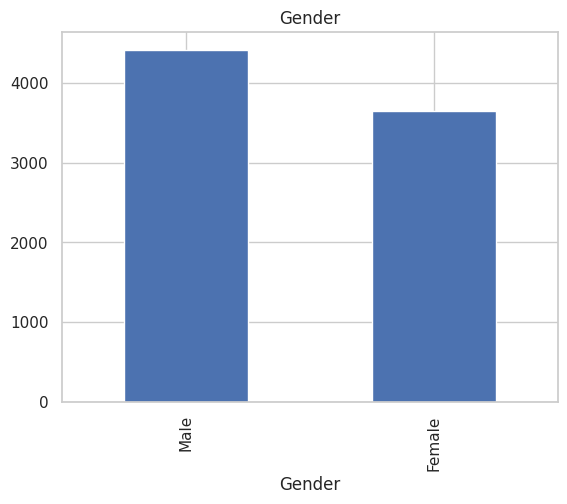

In [ ]:
train['Gender'].value_counts().plot(kind='bar')
plt.title("Gender")
plt.show()

In [ ]:
train['Gender'] = train['Gender'].replace({"Male":1,"Female":0})
test["Gender"]= test["Gender"].replace({"Male":1,"Female":0})

/tmp/ipython-input-1314081816.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train['Gender'] = train['Gender'].replace({"Male":1,"Female":0})
/tmp/ipython-input-1314081816.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test["Gender"]= test["Gender"].replace({"Male":1,"Female":0})


In [ ]:
train["Gender"].value_counts()

,count
Gender,
1,4417
0,3651


In [ ]:
test["Gender"].value_counts()

,count
Gender,
1,1424
0,1203


In [ ]:
train['Gender'].isnull().sum()

np.int64(0)

In [ ]:
test['Gender'].isnull().sum()

np.int64(0)

## **Ever_Married**

In [ ]:
train['Ever_Married'].unique()

array(['No', 'Yes', nan], dtype=object)

In [ ]:
train["Ever_Married"].isnull().sum()
test['Ever_Married'].isnull().sum()

np.int64(50)

In [ ]:
train['Ever_Married']=train['Ever_Married'].replace({"Yes":1,"No":0})
test['Ever_Married']=test['Ever_Married'].replace({"Yes":1,"No":0})

/tmp/ipython-input-1359616084.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train['Ever_Married']=train['Ever_Married'].replace({"Yes":1,"No":0})
/tmp/ipython-input-1359616084.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test['Ever_Married']=test['Ever_Married'].replace({"Yes":1,"No":0})


In [ ]:
train['Ever_Married']= train['Ever_Married'].fillna(1)
test['Ever_Married']=test['Ever_Married'].fillna(1)

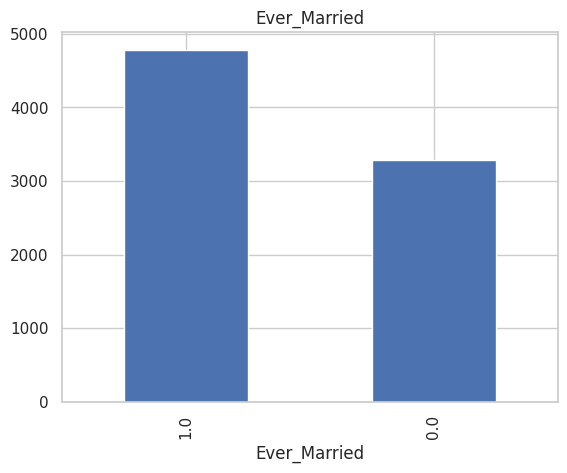

In [ ]:
train['Ever_Married'].value_counts().plot(kind='bar')
plt.title('Ever_Married')
plt.show()

## **Age**

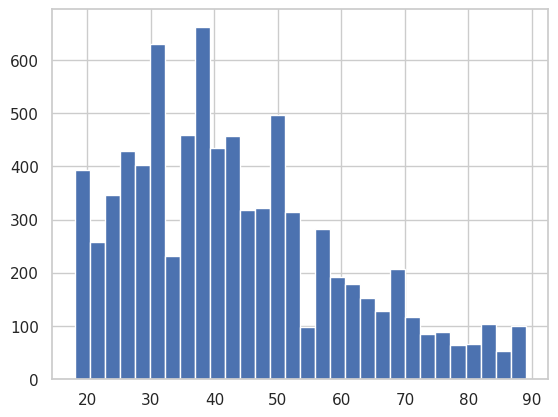

In [ ]:
plt.hist(train['Age'], bins= 30)
plt.show()

In [ ]:
train["Age"].isnull().sum()
test['Age'].isnull().sum()

np.int64(0)

<Axes: xlabel='Age', ylabel='count'>

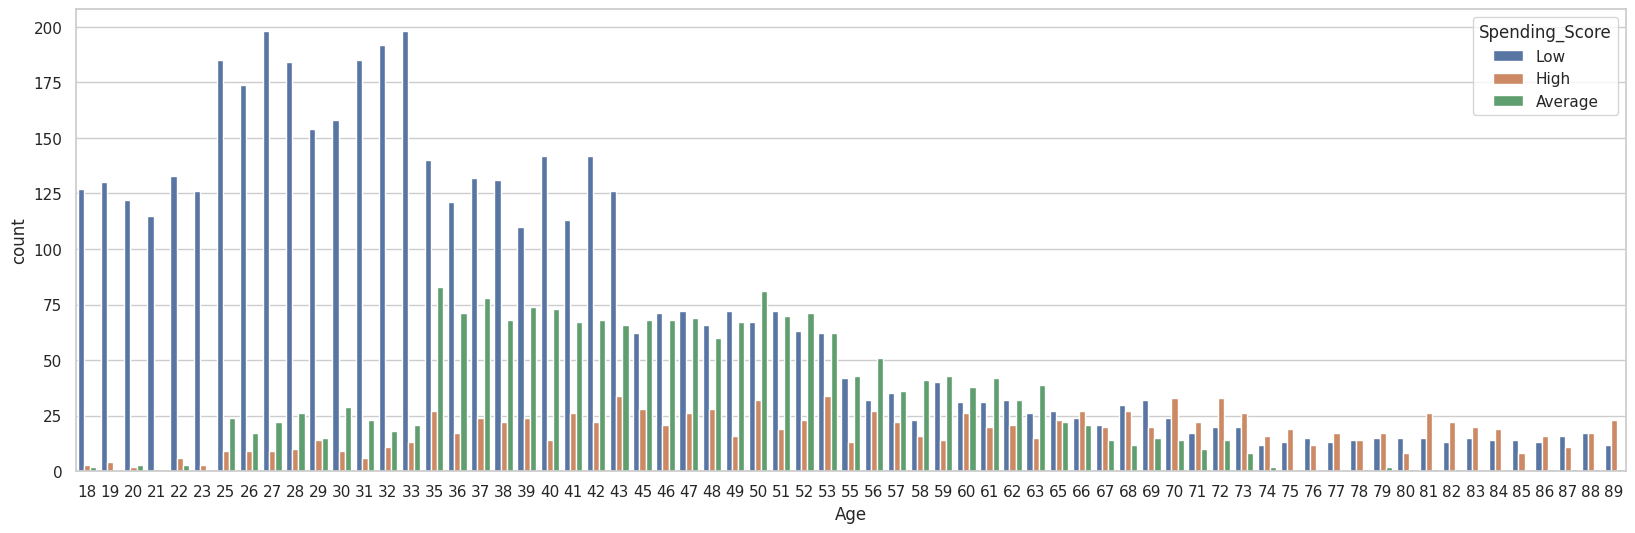

In [ ]:
plt.figure(figsize=(20,6))
sns.countplot(x="Age", data=train, hue="Spending_Score")

## **Graduated**

In [ ]:
train['Graduated'].isnull().sum()

np.int64(78)

In [ ]:
test["Graduated"].isnull().sum()

np.int64(24)

In [ ]:
test["Graduated"]= test["Graduated"].replace({"Yes":1,"No":0})
train['Graduated']=train['Graduated'].replace({"Yes":1,"No":0})

/tmp/ipython-input-2934507215.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test["Graduated"]= test["Graduated"].replace({"Yes":1,"No":0})
/tmp/ipython-input-2934507215.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train['Graduated']=train['Graduated'].replace({"Yes":1,"No":0})


In [ ]:
test["Graduated"] = test["Graduated"].fillna(1)
train['Graduated']=train['Graduated'].fillna(1)

In [ ]:
train['Graduated'].isnull().sum()

np.int64(0)

In [ ]:
test['Graduated'].isnull().sum()

np.int64(0)

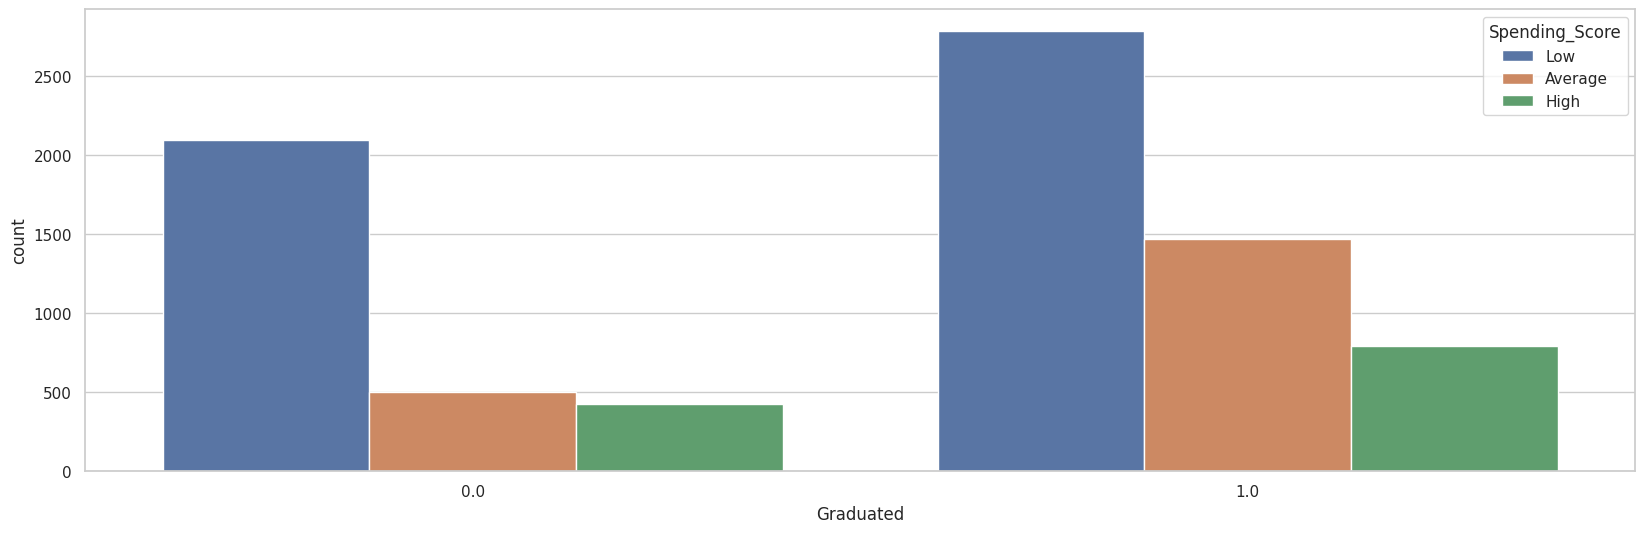

In [ ]:
plt.figure(figsize=(20,6))
sns.countplot(x="Graduated", data=train, hue="Spending_Score")
plt.show()


## **Profession**

In [ ]:
train["Profession"].isnull().sum()

np.int64(124)

In [ ]:
test["Profession"].isnull().sum()

np.int64(38)

In [ ]:
train["Profession"].value_counts()

,count
Profession,
Artist,2516
Healthcare,1332
Entertainment,949
Engineer,699
Doctor,688
Lawyer,623
Executive,599
Marketing,292
Homemaker,246


In [ ]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(strategy="most_frequent")

In [ ]:
train['Profession'] = train['Profession'].fillna(train['Profession'].mode()[0])
test['Profession'] = test['Profession'].fillna(test['Profession'].mode()[0])

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train["Profession"]=le.fit_transform(train["Profession"])
test["Profession"]= le.fit_transform(test["Profession"])

In [ ]:


train["Profession"].unique()

array([5, 2, 7, 3, 0, 4, 1, 6, 8])

In [ ]:
test["Profession"].unique()

array([2, 5, 0, 4, 8, 1, 7, 3, 6])

In [ ]:
train["Profession"].head()

,Profession
0,5
1,2
2,2
3,7
4,3


In [ ]:
test["Profession"].head()

,Profession
0,2
1,5
2,0
3,4
4,8


In [ ]:
train["Profession"].isnull().sum()

np.int64(0)

In [ ]:
test['Profession'].isnull().sum()

np.int64(0)

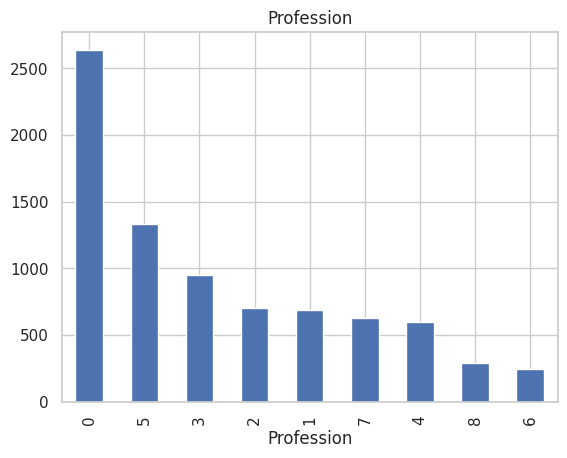

In [ ]:
train["Profession"].value_counts().plot(kind='bar')
plt.title("Profession")
plt.show()

## **Work_Experience**

In [ ]:
train['Work_Experience'].unique()

array([ 1., nan,  0.,  4.,  9., 12.,  3., 13.,  5.,  8., 14.,  7.,  2.,
        6., 10., 11.])

In [ ]:
train['Work_Experience'].isnull().sum()

np.int64(829)

In [ ]:

si_num =SimpleImputer(strategy = 'median')

In [ ]:
train['Work_Experience']= si_num.fit_transform(train[['Work_Experience']])
test['Work_Experience'] = si_num.fit_transform(test[["Work_Experience"]])

In [ ]:
train['Work_Experience'].isnull().sum()

np.int64(0)

In [ ]:
test['Work_Experience'].isnull().sum()

np.int64(0)

In [ ]:
train.columns

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')

<Axes: xlabel='Work_Experience', ylabel='count'>

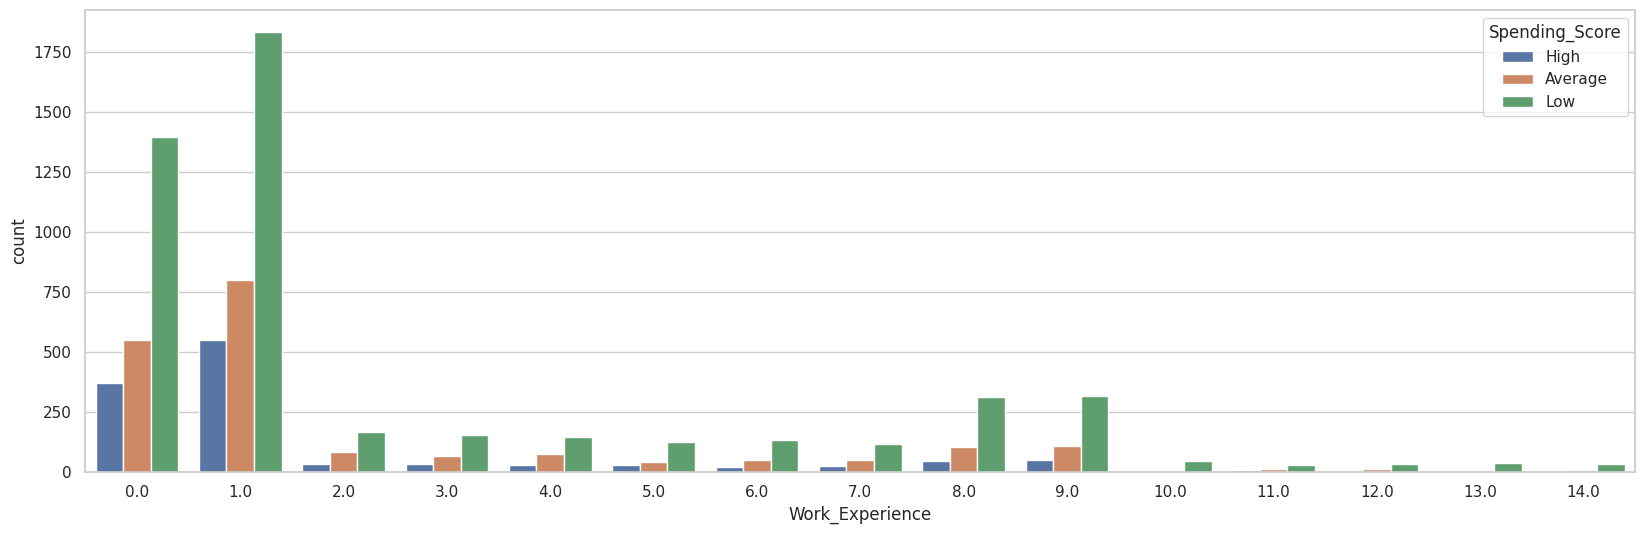

In [ ]:
plt.figure(figsize=(20,6))
sns.countplot(x="Work_Experience", data=train, hue="Spending_Score")

## **Spending Score**

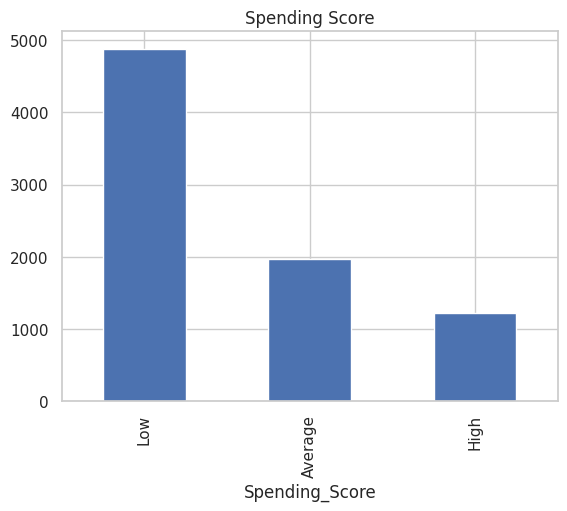

In [ ]:
train['Spending_Score'].value_counts().plot(kind = "bar")
plt.title("Spending Score")
plt.show()

In [ ]:
train['Spending_Score'].isnull().sum()

np.int64(0)

In [ ]:

test['Spending_Score'].isnull().sum()

np.int64(0)

In [ ]:
train['Spending_Score'] = train['Spending_Score'].replace({"Low":0,"Average":1,"High":2})

test['Spending_Score'] = test['Spending_Score'].replace({"Low":0,"Average":1,"High":2})

/tmp/ipython-input-2859569801.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train['Spending_Score'] = train['Spending_Score'].replace({"Low":0,"Average":1,"High":2})
/tmp/ipython-input-2859569801.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test['Spending_Score'] = test['Spending_Score'].replace({"Low":0,"Average":1,"High":2})


In [ ]:

test['Spending_Score'].unique()

array([0, 1, 2])

## **Family_Size**

In [ ]:
train["Family_Size"].unique()

array([ 4.,  3.,  1.,  2.,  6., nan,  5.,  8.,  7.,  9.])

In [ ]:
train['Family_Size'].isnull().sum()

np.int64(335)

In [ ]:
test['Family_Size'].isnull().sum()

np.int64(113)

In [ ]:
train['Family_Size']= train['Family_Size'].fillna(2)
test['Family_Size']=test['Family_Size'].fillna(2)

In [ ]:
train['Family_Size'].isnull().sum()

np.int64(0)

<Axes: xlabel='Family_Size', ylabel='count'>

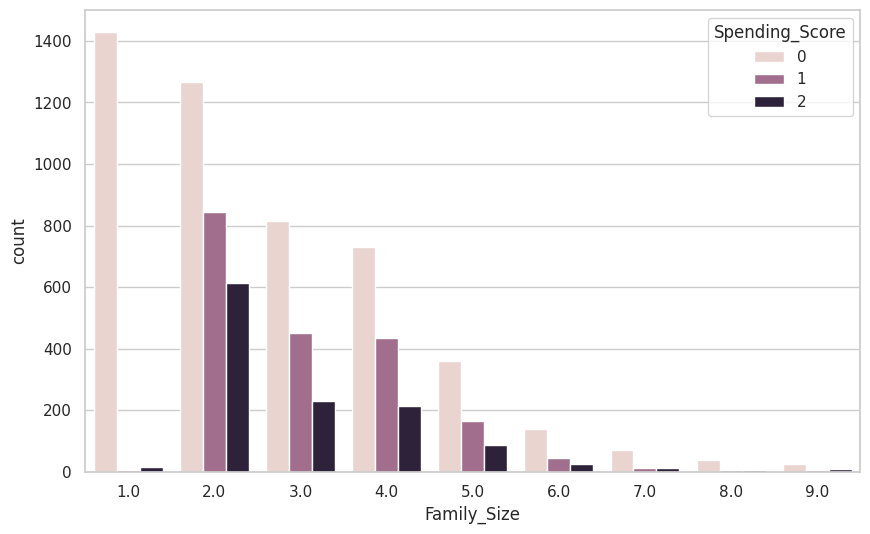

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x="Family_Size", data=train, hue="Spending_Score")

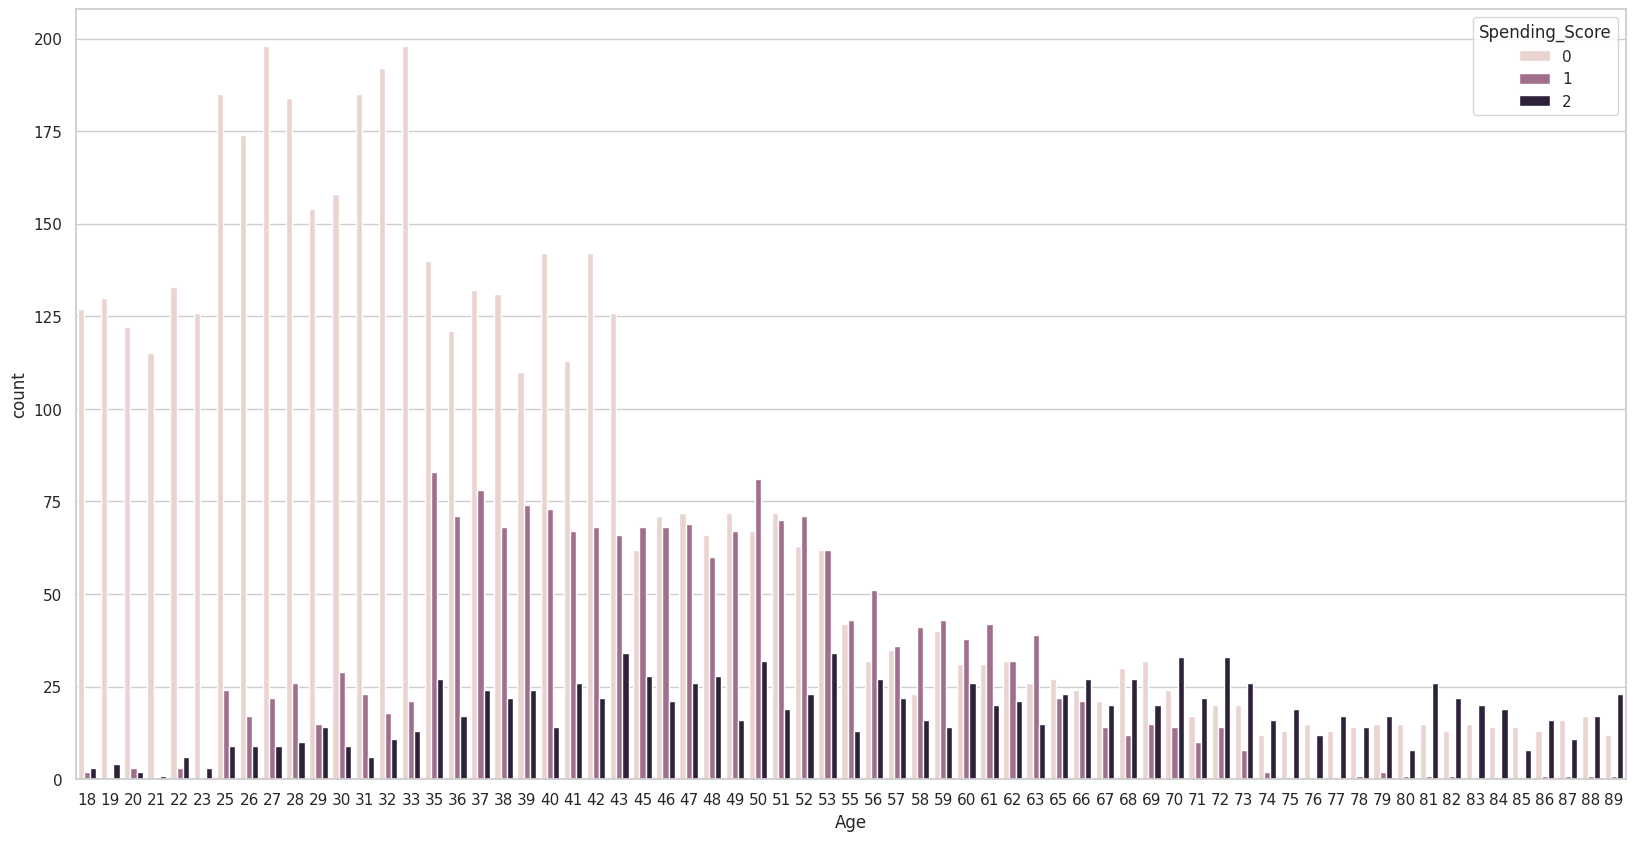

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(x="Age", data=train, hue="Spending_Score")
plt.show()

## **Var_1**

In [ ]:
train['Var_1'].unique()

array(['Cat_4', 'Cat_6', 'Cat_7', 'Cat_3', 'Cat_1', 'Cat_2', nan, 'Cat_5'],
      dtype=object)

In [ ]:
train['Var_1'].isnull().sum()

np.int64(76)

In [ ]:

test["Var_1"].isnull().sum()

np.int64(32)

In [ ]:
train['Var_1'] = train['Var_1'].fillna(6)
test['Var_1']= test['Var_1'].fillna(6)

In [ ]:
train['Var_1'].unique()

array(['Cat_4', 'Cat_6', 'Cat_7', 'Cat_3', 'Cat_1', 'Cat_2', 6, 'Cat_5'],
      dtype=object)

In [ ]:
train['Var_1'] = train['Var_1'].replace({'Cat_1':1,'Cat_2':2,'Cat_3':3,'Cat_4':4,'Cat_5':5,'Cat_6':6,'Cat_7':7})
test['Var_1'] = test['Var_1'].replace({'Cat_1':1,'Cat_2':2,'Cat_3':3,'Cat_4':4,'Cat_5':5,'Cat_6':6,'Cat_7':7})


/tmp/ipython-input-2347704274.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train['Var_1'] = train['Var_1'].replace({'Cat_1':1,'Cat_2':2,'Cat_3':3,'Cat_4':4,'Cat_5':5,'Cat_6':6,'Cat_7':7})
/tmp/ipython-input-2347704274.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test['Var_1'] = test['Var_1'].replace({'Cat_1':1,'Cat_2':2,'Cat_3':3,'Cat_4':4,'Cat_5':5,'Cat_6':6,'Cat_7':7})


In [ ]:
train['Var_1'].unique()

array([4, 6, 7, 3, 1, 2, 5])

In [ ]:
train['Var_1'].isnull().sum()

np.int64(0)

## **Segmentation**

In [ ]:
train['Segmentation'].isnull().sum()

np.int64(0)

In [ ]:
test['Segmentation'].isnull().sum()

np.int64(0)

In [ ]:
train['Segmentation']= le.fit_transform(train['Segmentation'])
test['Segmentation']= le.fit_transform(test['Segmentation'])

In [ ]:
train['Segmentation'].unique()

array([3, 0, 1, 2])

/tmp/ipython-input-3723866888.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=train['Segmentation'],palette='Set1')
/tmp/ipython-input-3723866888.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=test['Segmentation'],palette='Set1')


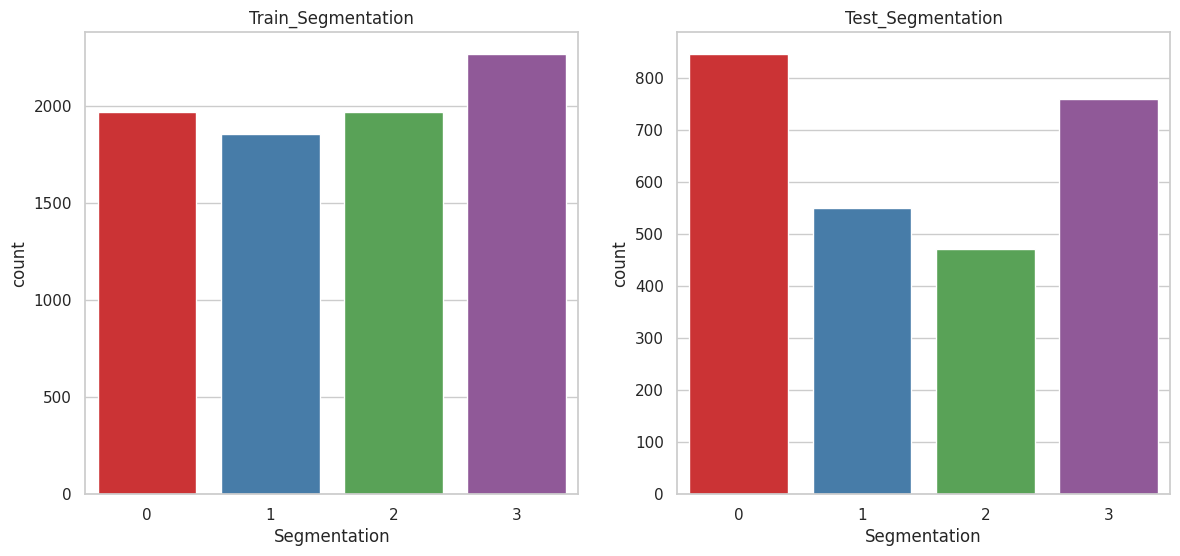

In [ ]:
plt.figure(figsize =(14,6))
plt.subplot(1,2,1)
sns.countplot(x=train['Segmentation'],palette='Set1')
plt.title('Train_Segmentation')
plt.subplot(1,2,2)
sns.countplot(x=test['Segmentation'],palette='Set1')
plt.title('Test_Segmentation')
plt.show()

## **Features Engineering**

In [ ]:
train.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,1,0.0,22,0.0,5,1.0,0,4.0,4,3
1,462643,0,1.0,38,1.0,2,1.0,1,3.0,4,0
2,466315,0,1.0,67,1.0,2,1.0,0,1.0,6,1
3,461735,1,1.0,67,1.0,7,0.0,2,2.0,6,1
4,462669,0,1.0,40,1.0,3,1.0,2,6.0,6,0


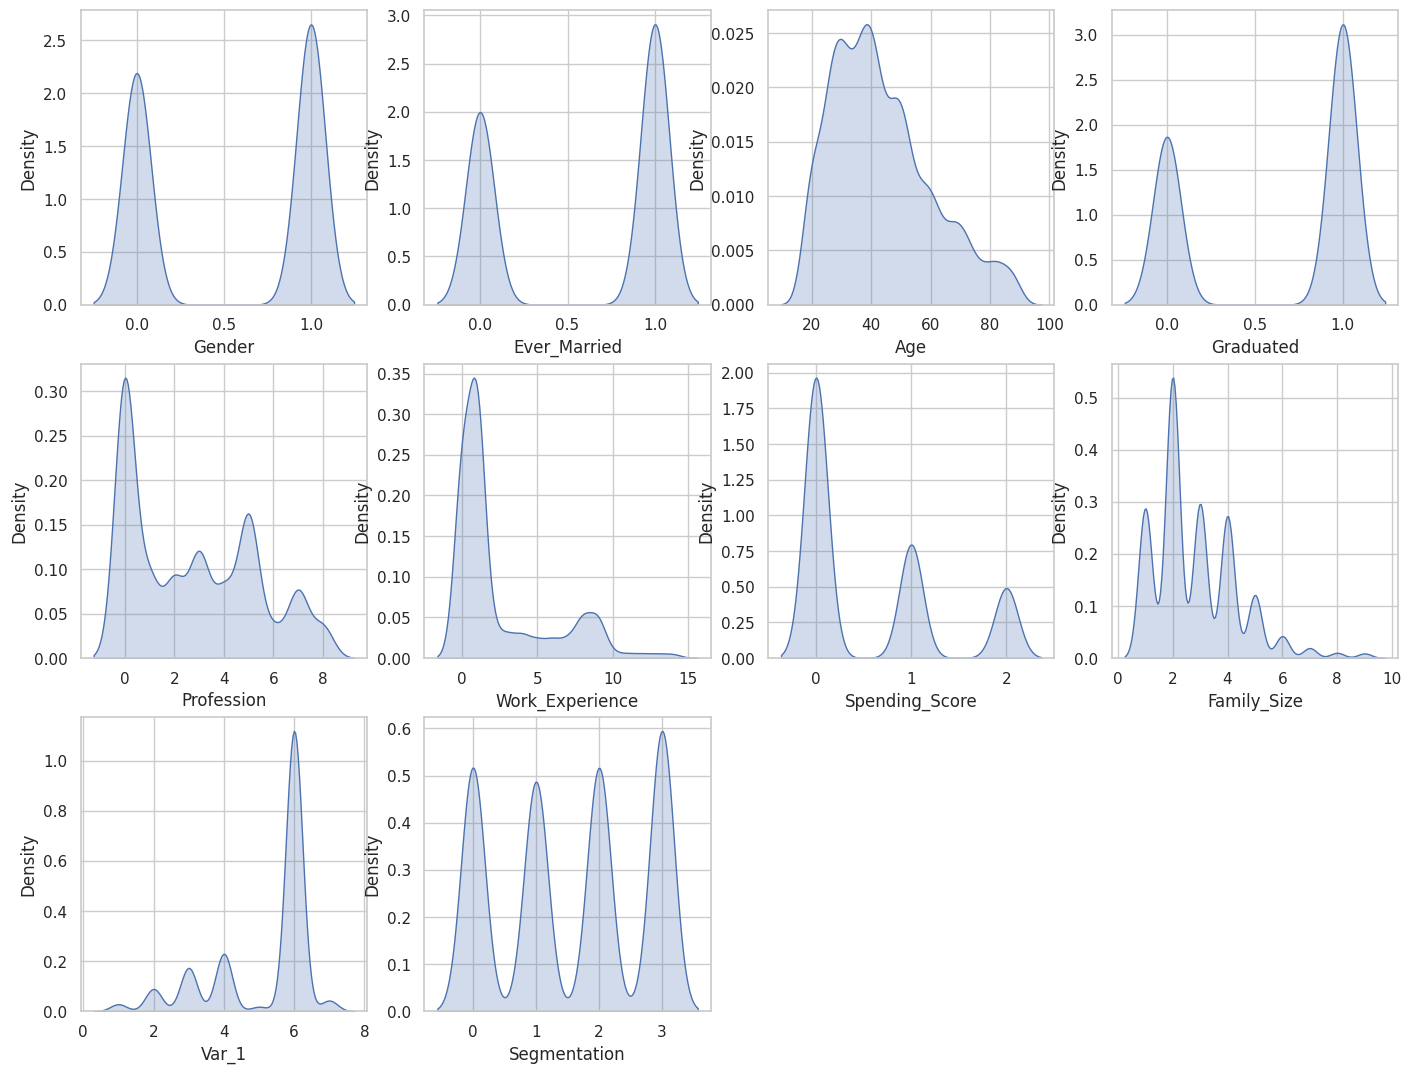

In [ ]:
plt.figure(figsize=(17,13))
i=1
for col in train.iloc[:,1:]:
  plt.subplot(3,4,i)
  sns.kdeplot(train[col],fill =True)
  i+=1
plt.show()

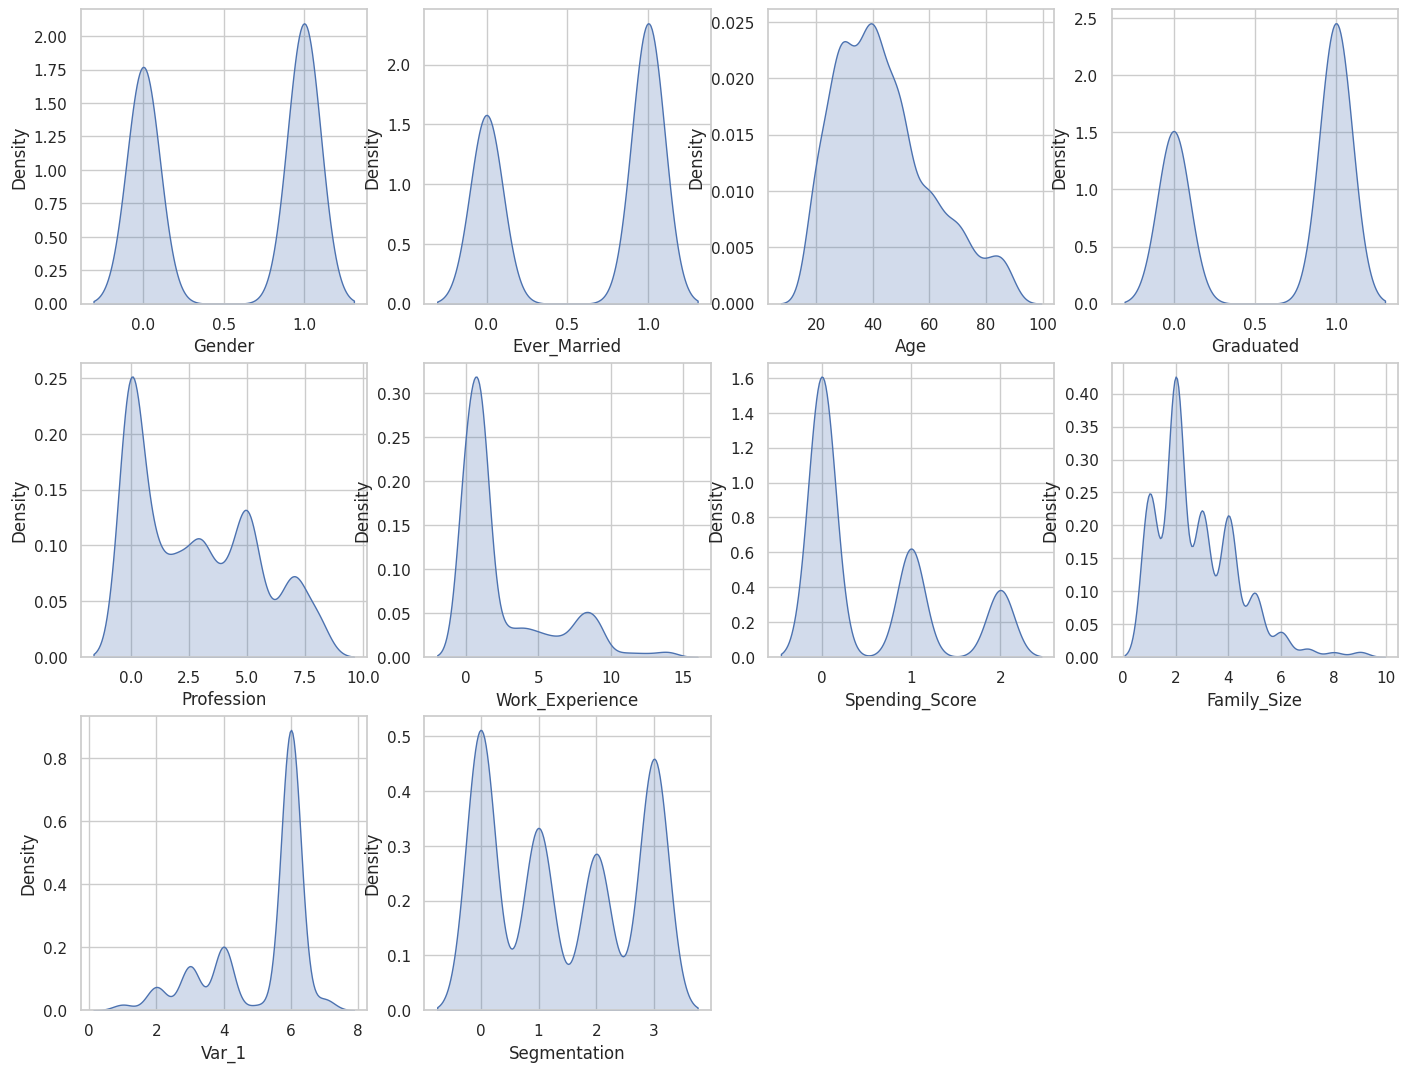

In [ ]:
plt.figure(figsize=(17,13))
i=1
for col in test.iloc[:,1:]:
  plt.subplot(3,4,i)
  sns.kdeplot(test[col],fill =True)
  i+=1
plt.show()

## **Outliers**

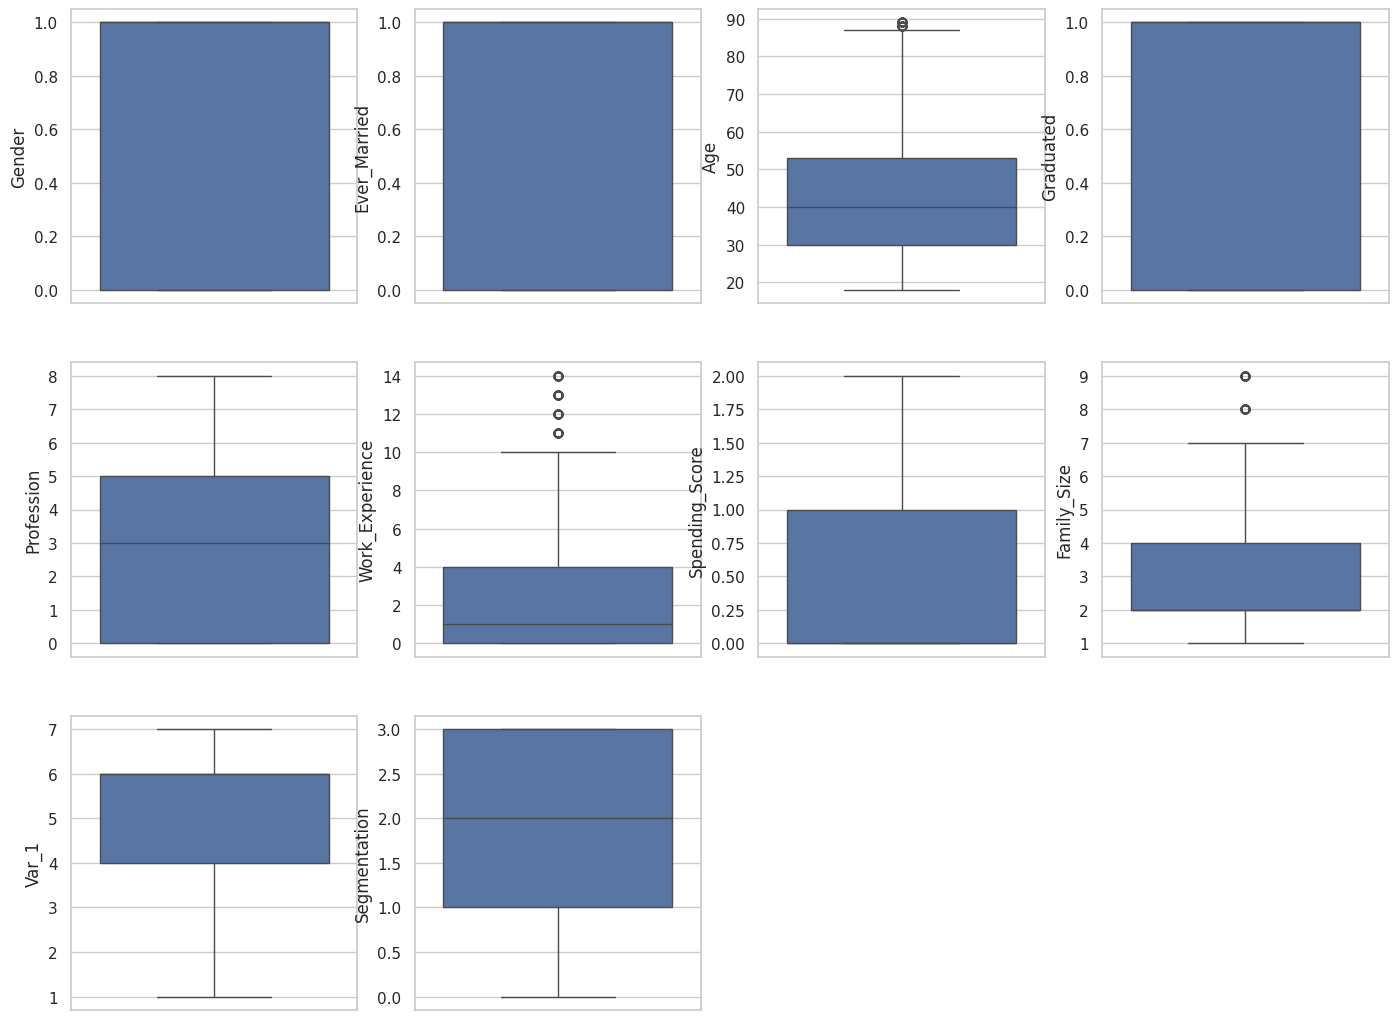

In [ ]:
plt.figure(figsize=(17,13))
i=1
for col in train.iloc[:,1:]:
  plt.subplot(3,4,i)
  sns.boxplot(y= train[col],data=train)
  i+=1
plt.show()

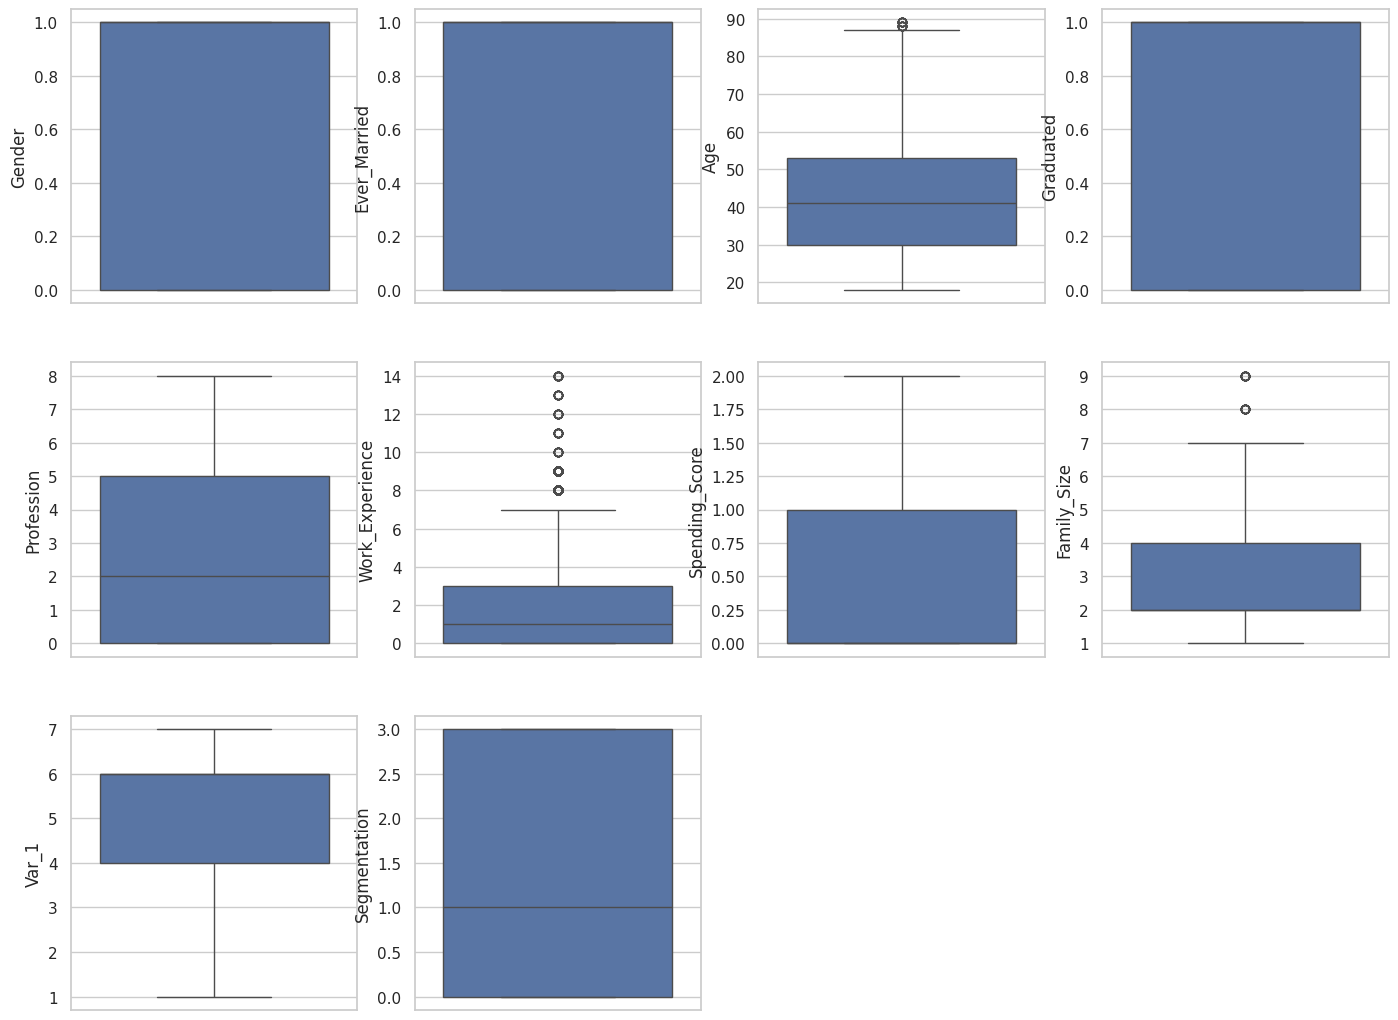

In [ ]:
plt.figure(figsize=(17,13))
i=1
for col in test.iloc[:,1:]:
  plt.subplot(3,4,i)
  sns.boxplot(y= test[col],data=test)
  i+=1
plt.show()

###  **Behavioral Segmentation**

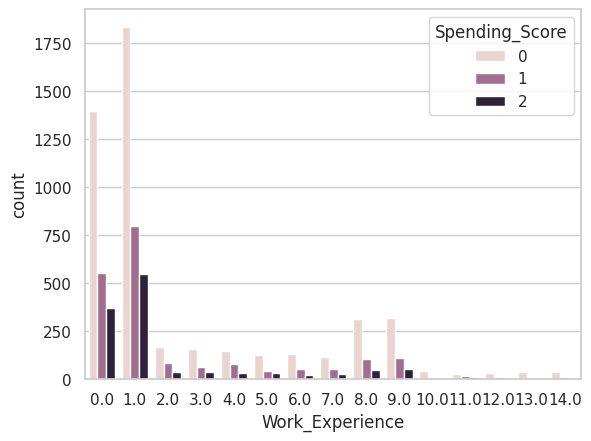

In [ ]:
sns.countplot(x="Work_Experience", data=train, hue="Spending_Score")
plt.show()

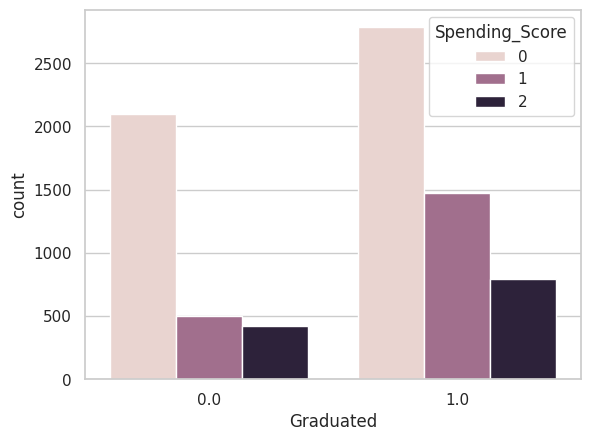

In [ ]:
sns.countplot(x="Graduated", data=train, hue="Spending_Score")
plt.show()

## **Features Selection**

In [ ]:
X_train = train.drop(['ID','Segmentation'],axis=1)
y_train = train['Segmentation']

In [ ]:
X_test=test.drop(['ID','Segmentation'],axis = 1)
y_test = test['Segmentation']

In [ ]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((8068, 9), (8068,), (2627, 9), (2627,))

## **Feature Scaling**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train),columns = X_train.columns)
X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test),columns = X_test.columns)

In [ ]:
X_train_scaled.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,1.0,0.0,0.056338,0.0,0.625,0.071429,0.0,0.375,0.500000
1,0.0,1.0,0.281690,1.0,0.250,0.071429,0.5,0.250,0.500000
2,0.0,1.0,0.690141,1.0,0.250,0.071429,0.0,0.000,0.833333
3,1.0,1.0,0.690141,1.0,0.875,0.000000,1.0,0.125,0.833333
4,0.0,1.0,0.309859,1.0,0.375,0.071429,1.0,0.625,0.833333


In [ ]:
X_test_scaled.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,0.0,1.0,0.253521,1.0,0.250,0.000000,0.0,0.000,0.833333
1,1.0,1.0,0.267606,1.0,0.625,0.571429,0.5,0.375,0.833333
2,0.0,1.0,0.718310,0.0,0.000,0.000000,0.0,0.000,0.833333
3,1.0,1.0,0.577465,0.0,0.500,0.785714,1.0,0.125,0.833333
4,0.0,0.0,0.014085,0.0,1.000,0.071429,0.0,0.375,0.833333


## **KMeans Model**

In [ ]:
from sklearn.cluster import KMeans


### **Elbow Method**

In [ ]:
Wcss = []
for i in range(1,11):
  model =KMeans(n_clusters = i,random_state=0)
  model.fit(X_train_scaled)
  Wcss.append(model.inertia_)
Wcss

[9382.620432492953,
 6769.670844681218,
 5612.1462592708485,
 4714.726535601017,
 4023.6516205303537,
 3835.792564125944,
 3740.6067823204908,
 3161.4755591215144,
 2823.716991211136,
 2611.835585825459]

Text(0, 0.5, 'WCSS')

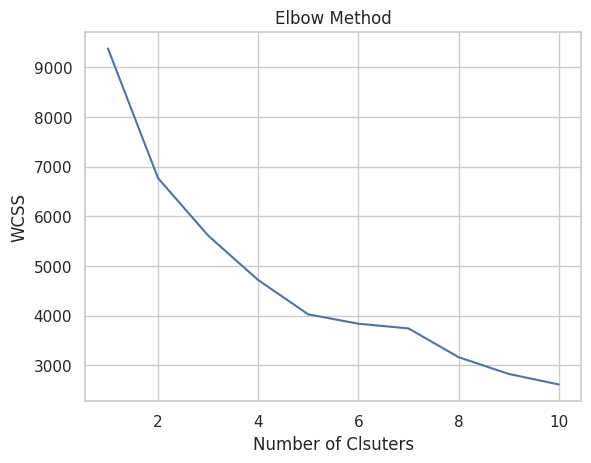

In [ ]:
plt.plot(range(1,11),Wcss)
plt.title("Elbow Method")
plt.xlabel("Number of Clsuters")
plt.ylabel("WCSS")

In [ ]:
Wcss = []
for i in range(1,11):
  model =KMeans(n_clusters = i,random_state=0)
  model.fit(X_test_scaled)
  Wcss.append(model.inertia_)
Wcss

[3061.0685587249973,
 2397.9107107571053,
 1928.3523722513821,
 1717.1750531700977,
 1431.0900050368746,
 1350.848998158563,
 1123.7319215943223,
 933.9267638351109,
 909.8065785568273,
 838.3918348324272]

Text(0, 0.5, 'WCSS')

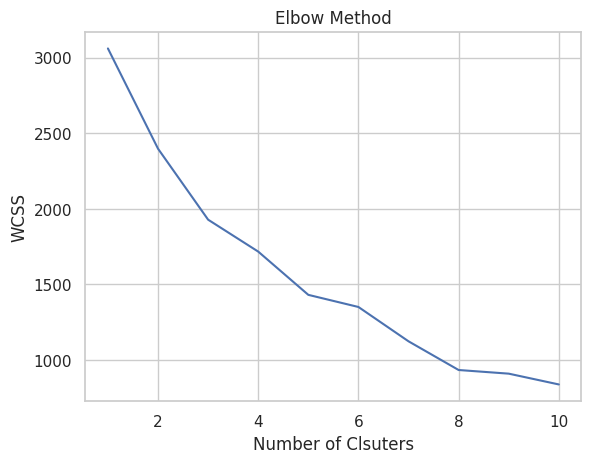

In [ ]:
plt.plot(range(1,11),Wcss)
plt.title("Elbow Method")
plt.xlabel("Number of Clsuters")
plt.ylabel("WCSS")

In [ ]:
from sklearn.cluster import KMeans
model= KMeans(n_clusters=3,random_state=0)
model.fit(X_train_scaled)

KMeans(n_clusters=3, random_state=0)

## **Predication of train Data**

In [ ]:
train_pred = model.predict(X_train_scaled)

In [ ]:
train_pred[:100]

array([1, 0, 0, 2, 0, 2, 1, 1, 0, 0, 1, 1, 1, 2, 0, 1, 1, 1, 2, 0, 2, 1,
       2, 1, 0, 2, 1, 2, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 2, 1, 1, 1, 0,
       2, 0, 2, 1, 1, 1, 0, 0, 2, 0, 2, 2, 1, 1, 0, 2, 2, 2, 2, 2, 2, 1,
       2, 1, 2, 0, 2, 0, 0, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 0,
       1, 2, 1, 0, 0, 2, 2, 2, 1, 2, 2, 2], dtype=int32)

In [ ]:
y_train[:100].values

array([3, 0, 1, 1, 0, 2, 2, 3, 3, 2, 0, 3, 3, 0, 1, 2, 3, 1, 1, 2, 0, 3,
       0, 1, 1, 2, 0, 2, 1, 2, 2, 0, 3, 3, 3, 3, 3, 3, 0, 2, 1, 3, 0, 2,
       0, 0, 1, 0, 3, 0, 1, 2, 0, 2, 0, 1, 3, 3, 2, 3, 2, 2, 3, 0, 0, 0,
       0, 0, 1, 0, 3, 0, 1, 3, 2, 1, 3, 0, 2, 3, 2, 3, 0, 1, 0, 3, 2, 2,
       3, 3, 1, 2, 2, 3, 1, 3, 3, 2, 2, 3])

In [ ]:
X_train_scaled_new = X_train_scaled.copy()


In [ ]:
X_train_scaled_new['Old_Target_Label'] = y_train
X_train_scaled_new['New_Target_Label'] = train_pred

In [ ]:
X_train_scaled_new.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Old_Target_Label,New_Target_Label
0,1.0,0.0,0.056338,0.0,0.625,0.071429,0.0,0.375,0.500000,3,1
1,0.0,1.0,0.281690,1.0,0.250,0.071429,0.5,0.250,0.500000,0,0
2,0.0,1.0,0.690141,1.0,0.250,0.071429,0.0,0.000,0.833333,1,0
3,1.0,1.0,0.690141,1.0,0.875,0.000000,1.0,0.125,0.833333,1,2
4,0.0,1.0,0.309859,1.0,0.375,0.071429,1.0,0.625,0.833333,0,0


In [ ]:

X_train_scaled_new['Old_Target_Label'].value_counts()


,count
Old_Target_Label,
3,2268
0,1972
2,1970
1,1858


In [ ]:
X_train_scaled_new['New_Target_Label'].value_counts()


,count
New_Target_Label,
1,3285
2,2839
0,1944


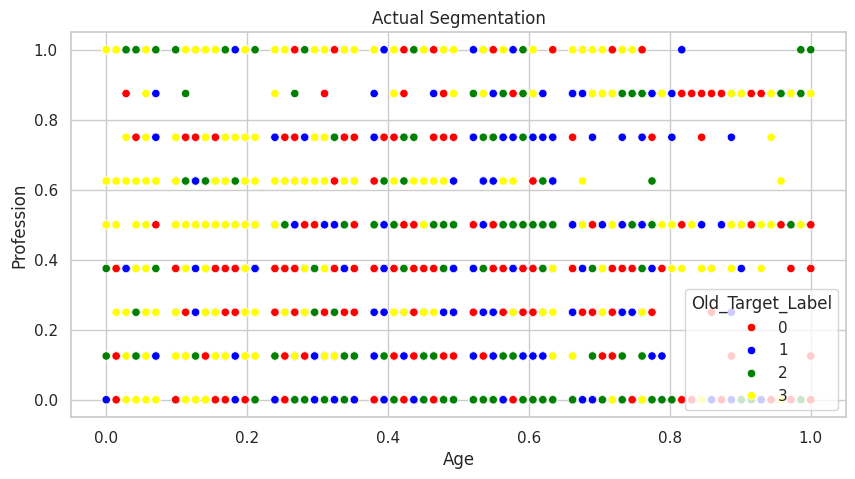

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=X_train_scaled_new['Age'],y=X_train_scaled_new['Profession'],
                hue=X_train_scaled_new['Old_Target_Label'],
                palette=['Red','Blue','Green','Yellow'])
plt.title("Actual Segmentation")
plt.show()

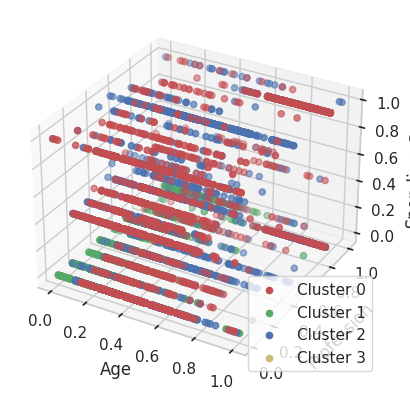

In [ ]:

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

colors = ['r', 'g', 'b','y']
for cluster in range(4):
    ax.scatter(X_train_scaled_new[X_train_scaled_new['New_Target_Label'] == cluster]['Age'],
               X_train_scaled_new[X_train_scaled_new['New_Target_Label'] == cluster]['Profession'],
               X_train_scaled_new[X_train_scaled_new['New_Target_Label'] == cluster]['Spending_Score'],
               c=colors[cluster], label=f'Cluster {cluster}')

ax.set_xlabel('Age')
ax.set_ylabel('Profession')
ax.set_zlabel('Spending_Score')
plt.legend()
plt.show()

## **Predication of test Data**

In [ ]:
test_pred = model.predict(X_test_scaled)

In [ ]:
X_test_scaled_new = X_test_scaled.copy()


In [ ]:
X_test_scaled_new['Old_Target_Label'] = y_test
X_test_scaled_new['New_Target_Label'] = test_pred

## **Silhouette Score Check performance**

In [ ]:
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_train_scaled)

KMeans(n_clusters=4, random_state=42)

In [ ]:
train_pred = kmeans.predict(X_train_scaled)


## **Silhouette Score For train Data**

In [ ]:
silhouette_avg = silhouette_score(X_train_scaled, train_pred)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.298872961452178


## **Silhouette Score For Test Data**

In [ ]:
test_pred = kmeans.predict(X_test_scaled)

# Calculate the silhouette score for Train data
silhouette_avg = silhouette_score(X_test_scaled, test_pred)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.3006645812606343


## *Visualization**

In [ ]:
def silhouette_visualizer(data,model):
    visualizer=SilhouetteVisualizer(model,colors="yellowbrick")
    visualizer.fit(data)

## **Visualization of Train Data**

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


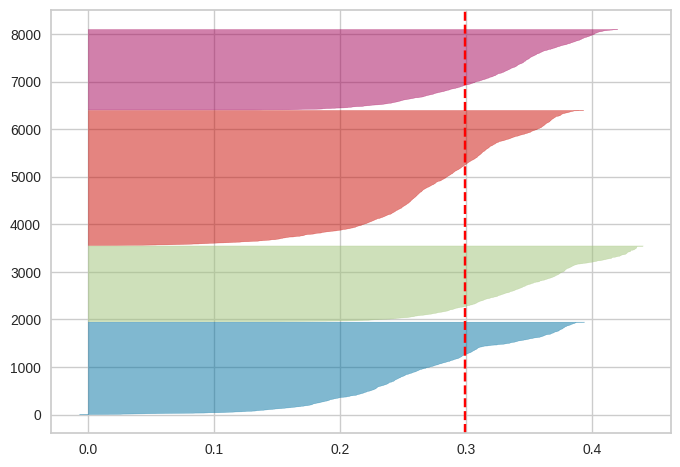

In [ ]:
silhouette_visualizer(X_train_scaled,kmeans)
plt.show()

## **For test Data**

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


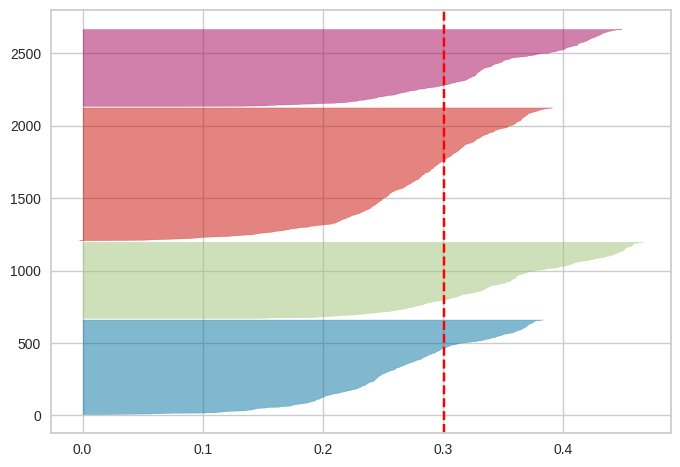

In [ ]:
silhouette_visualizer(X_test_scaled,kmeans)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plotseg(data, labels, feature_names):
    plt.figure(figsize=(10, 6))

    scatter = plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', s=50)

    legend1 = plt.legend(*scatter.legend_elements(), title="Clusters")
    plt.gca().add_artist(legend1)

    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])

    plt.title("Customer Segmentation based on K-Means Clustering")

    plt.show()


## **Age and Spending Score**

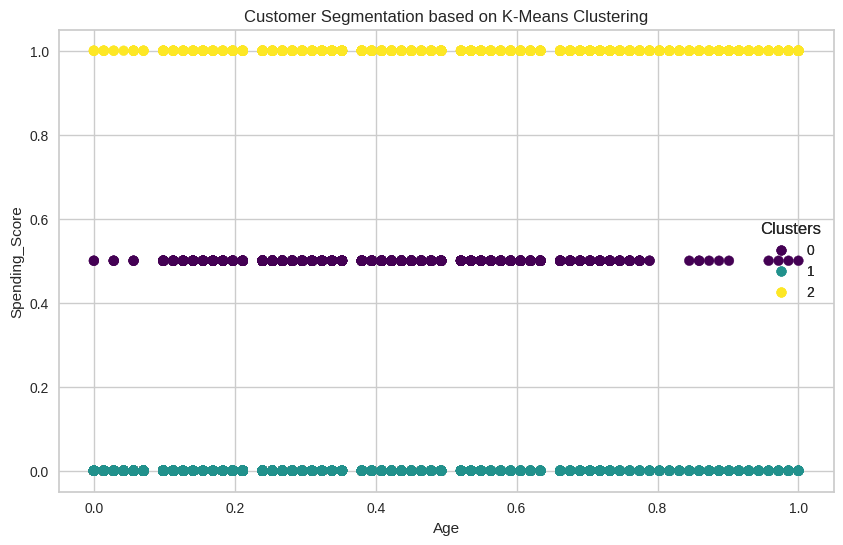

In [ ]:
clus = X_train_scaled.loc[:, ["Age", "Spending_Score"]].values  # Age and Spending Score
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
Y = kmeans.fit_predict(clus)

plotseg(clus, Y, ["Age", "Spending_Score"])


## **Family size and profession**

In [ ]:
clus1 = train.loc[:,["Family_Size","Profession"]].values

In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
Y = kmeans.fit_predict(clus1)



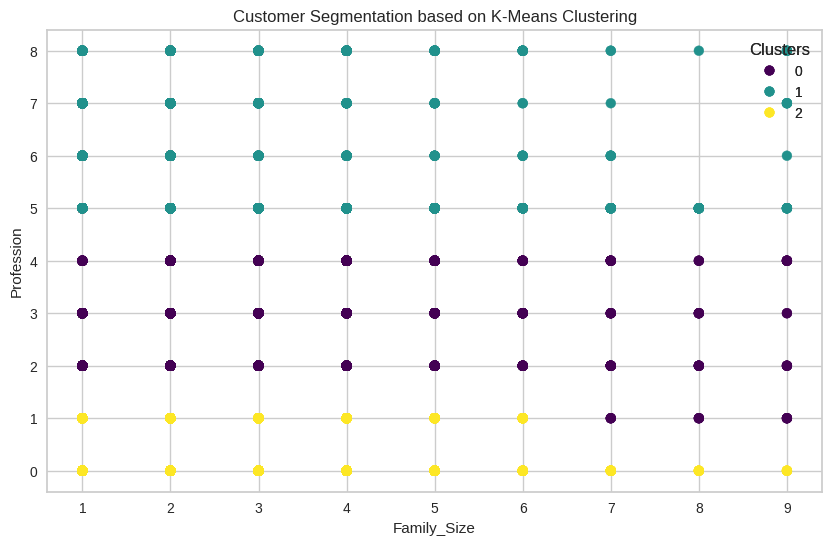

In [ ]:
plotseg(clus1, Y, ["Family_Size","Profession"])
plt.show()

/tmp/ipython-input-1818923882.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_states, x='State', y='Total', palette='crest')


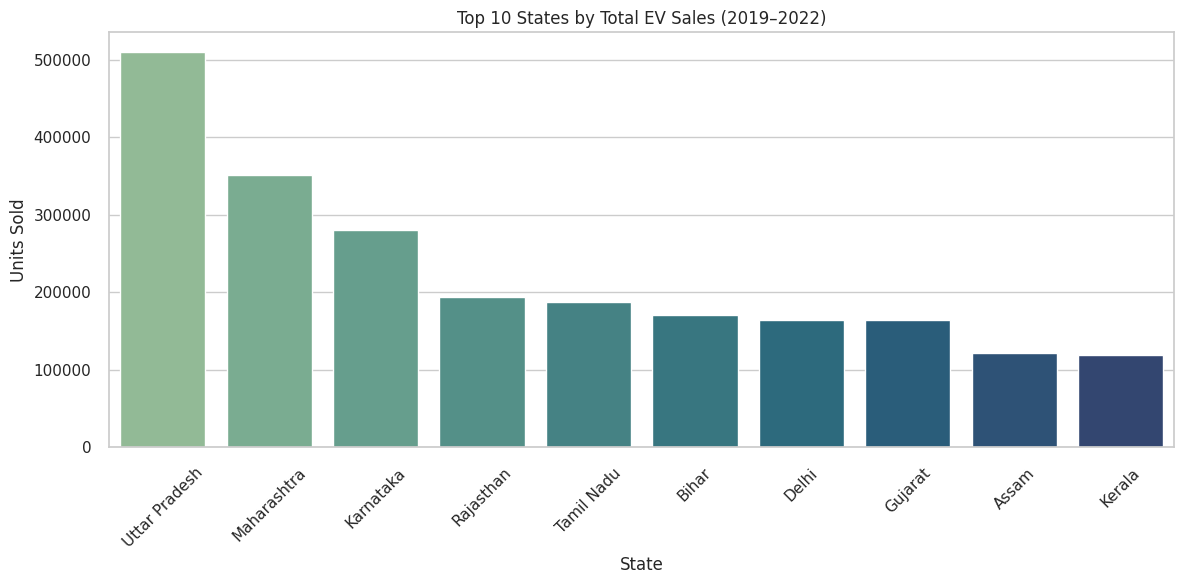

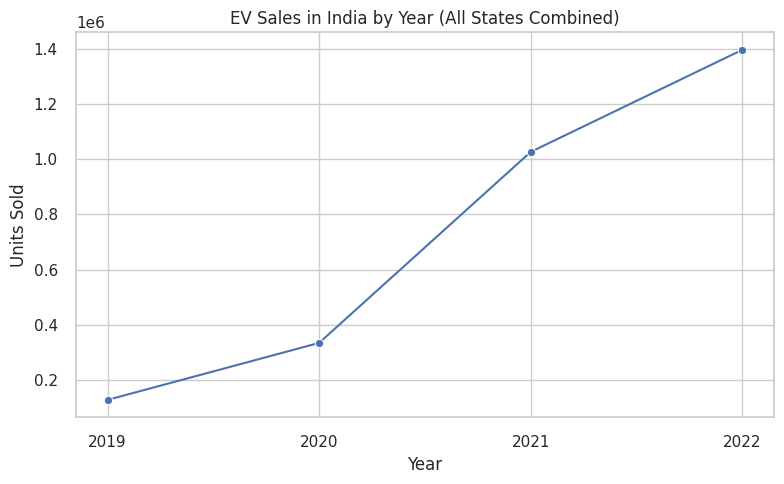

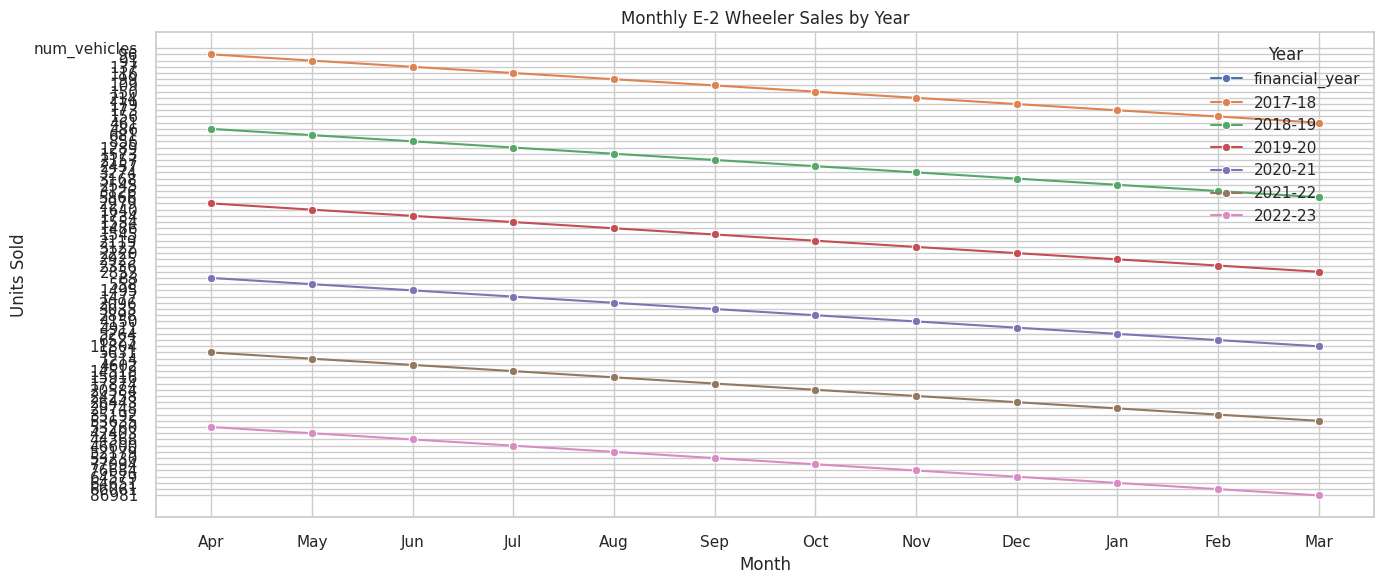


Top 5 Highest-Selling Months:
              Year Month    Units_Sold
0   financial_year   NaN  num_vehicles
5          2017-18   Aug            99
1          2017-18   Apr            96
2          2017-18   May            91
72         2022-23   Mar         86981

--- Decision Tree Segmentation ---


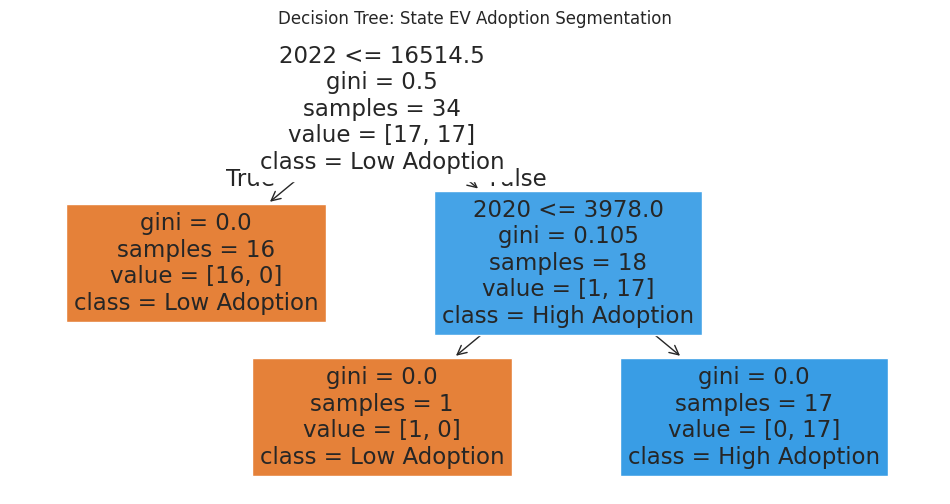

Feature Importances: [0.         0.11111111 0.         0.88888889]

--- ARIMA Forecasting ---

📈 Forecast for 2026:
                 Date  Forecast_Units
2026-01-01 2026-01-31    65673.505998
2026-02-01 2026-02-28    65285.998826
2026-03-01 2026-03-31    65657.989611
2026-04-01 2026-04-30    65300.893913
2026-05-01 2026-05-31    65643.690946
2026-06-01 2026-06-30    65314.620037
2026-07-01 2026-07-31    65630.514438
2026-08-01 2026-08-31    65327.268938
2026-09-01 2026-09-30    65618.372018
2026-10-01 2026-10-31    65338.925156
2026-11-01 2026-11-30    65607.182533
2026-12-01 2026-12-31    65349.666597


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Us

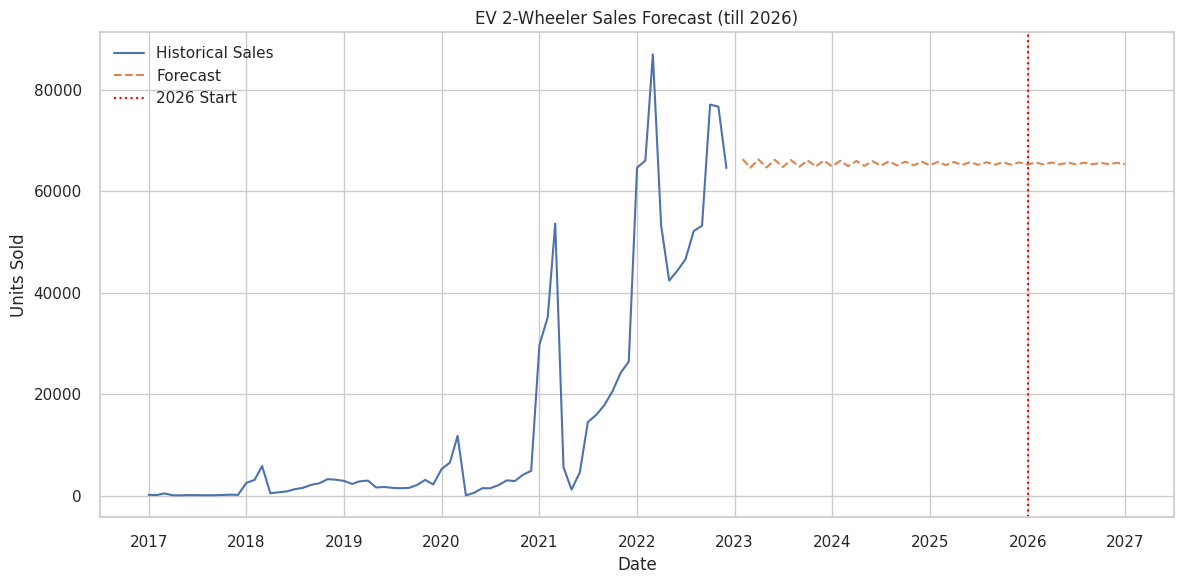

In [ ]:
# ----------------------------------------
# EV Market Segmentation & Forecasting
# ----------------------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

# ML libraries
from sklearn.tree import DecisionTreeClassifier, plot_tree
from statsmodels.tsa.arima.model import ARIMA

# ----------------------------------------
# Load CSV #1: State-wise Annual Sales
# ----------------------------------------
state_df = pd.read_csv("Demographics_Data.csv", header=None,
                       names=["SNo", "State", "2019", "2020", "2021", "2022"])
state_df.drop(columns=["SNo"], inplace=True)

# Convert sales columns to numeric
for col in ["2019", "2020", "2021", "2022"]:
    state_df[col] = pd.to_numeric(state_df[col], errors='coerce')

# Add Total Sales Column
state_df["Total"] = state_df[["2019", "2020", "2021", "2022"]].sum(axis=1)

# ----------------------------------------
# Load CSV #2: Monthly E-2 Wheeler Sales
# ----------------------------------------
monthly_df = pd.read_csv("Ev_2_Wheeler_Sales_by_years.csv", header=None,
                         names=["Vehicle_Type", "Year", "Month", "Units_Sold"])

# Month ordering for financial year
month_order = ['Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
               'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar']
monthly_df['Month'] = pd.Categorical(monthly_df['Month'], categories=month_order, ordered=True)

# ----------------------------------------
# Plot 1: Top 10 States by Total Sales
# ----------------------------------------
top_states = state_df.sort_values(by='Total', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_states, x='State', y='Total', palette='crest')
plt.title('Top 10 States by Total EV Sales (2019–2022)')
plt.ylabel('Units Sold')
plt.xlabel('State')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ----------------------------------------
# Plot 2: Yearly National EV Sales (Sum of All States)
# ----------------------------------------
yearly_total = state_df[["2019", "2020", "2021", "2022"]].sum().reset_index()
yearly_total.columns = ['Year', 'Units_Sold']

plt.figure(figsize=(8, 5))
sns.lineplot(data=yearly_total, x='Year', y='Units_Sold', marker='o')
plt.title('EV Sales in India by Year (All States Combined)')
plt.xlabel('Year')
plt.ylabel('Units Sold')
plt.tight_layout()
plt.show()

# ----------------------------------------
# Plot 3: Monthly Trend of E-2 Wheelers
# ----------------------------------------
plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_df, x='Month', y='Units_Sold', hue='Year', marker='o')
plt.title('Monthly E-2 Wheeler Sales by Year')
plt.xlabel('Month')
plt.ylabel('Units Sold')
plt.tight_layout()
plt.show()

# ----------------------------------------
# Plot 4: Top 5 Highest Selling Months
# ----------------------------------------
top_months = monthly_df.sort_values(by='Units_Sold', ascending=False).head(5)
print("\nTop 5 Highest-Selling Months:")
print(top_months[['Year', 'Month', 'Units_Sold']])

# ==========================================================
# 🔹 ML PART 1: Decision Tree for State Segmentation
# ==========================================================
print("\n--- Decision Tree Segmentation ---")

# Target variable: High (1) vs Low (0) adoption
median_sales = state_df['Total'].median()
state_df['Label'] = (state_df['Total'] > median_sales).astype(int)

# Features and target
X = state_df[['2019','2020','2021','2022']]
y = state_df['Label']

# Train Decision Tree
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X, y)

# Plot Tree
plt.figure(figsize=(12,6))
plot_tree(clf, feature_names=X.columns, class_names=["Low Adoption","High Adoption"], filled=True)
plt.title("Decision Tree: State EV Adoption Segmentation")
plt.show()

# Feature importance
print("Feature Importances:", clf.feature_importances_)

# ==========================================================
# 🔹 ML PART 2: Time-Series Forecasting (ARIMA) Automatic
# ==========================================================
print("\n--- ARIMA Forecasting ---")

# Prepare monthly sales (aggregate) with observed=True
sales = monthly_df.groupby(['Year','Month'], observed=True)['Units_Sold'].sum().reset_index()

# Extract only the starting year (e.g., "2017" from "2017-18")
sales['Year_clean'] = sales['Year'].astype(str).str[:4].astype(int)

# Combine Year + Month into proper datetime
sales['Date'] = pd.to_datetime(sales['Year_clean'].astype(str) + "-" + sales['Month'].astype(str), format='%Y-%b')

# Sort and set index
sales = sales.sort_values('Date').set_index('Date')

#  Convert Units_Sold to numeric
sales['Units_Sold'] = pd.to_numeric(sales['Units_Sold'], errors='coerce')
sales['Units_Sold'] = sales['Units_Sold'].fillna(0)  # Replace missing with 0 if any

# Train ARIMA model
model = ARIMA(sales['Units_Sold'].astype(float), order=(1,1,1))
model_fit = model.fit()


# ---------------------------
# 🔹 Auto Forecast till Selected Year
# ---------------------------
last_date = sales.index[-1]   # last available date in dataset
user_year = 2026  # 🔹 Change this year anytime

# Calculate months ahead
target_date = pd.to_datetime(f"{user_year}-12-01")
n_months = (target_date.year - last_date.year) * 12 + (target_date.month - last_date.month)

if n_months <= 0:
    print(f"\n⚠️ Year {user_year} is already in dataset. Please choose a future year.")
else:
    forecast = model_fit.forecast(steps=n_months)

    # Build forecast index
    forecast_index = pd.date_range(last_date, periods=n_months+1, freq='M')[1:]

    # Create forecast DataFrame
    forecast_df = pd.DataFrame({"Date": forecast_index, "Forecast_Units": forecast})

    # Filter only selected year
    year_forecast = forecast_df[forecast_df['Date'].dt.year == user_year]

    # Print forecast
    print(f"\n📈 Forecast for {user_year}:")
    print(year_forecast)

    # Plot results
    plt.figure(figsize=(12,6))
    plt.plot(sales.index, sales['Units_Sold'], label="Historical Sales")
    plt.plot(forecast_df['Date'], forecast_df['Forecast_Units'], label="Forecast", linestyle="--")
    plt.axvline(pd.to_datetime(f"{user_year}-01-01"), color="red", linestyle=":", label=f"{user_year} Start")
    plt.title(f"EV 2-Wheeler Sales Forecast (till {user_year})")
    plt.xlabel("Date")
    plt.ylabel("Units Sold")
    plt.legend()
    plt.tight_layout()
    plt.show()
